# 一个基本的图像分类器 Fashion MNIST
https://www.tensorflow.org/tutorials/keras/basic_classification

In [1]:
# 仅使用1号GPU 参考 https://github.com/keras-team/keras/issues/6031
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
# 仅使用需要的显存
import tensorflow as tf
from tensorflow.keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 包含70，000张灰度图片，有10个分类。这些照片用$28*28$低解析度展示服装样式。

In [3]:
# 下载 Fashion MNIST数据集，和MNIST的大小和数量都是一样的
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(train_images.shape, test_images.shape)

4423680/4422102 [==============================] - 12s 3us/step


((60000, 28, 28), (10000, 28, 28))

In [4]:
#设定分类id从0到9分别对应的服饰名称
class_names = ['T恤', '裤子', '套衫', '连衣裙', '外套', 
               '凉鞋', '衬衫', '运动鞋', '包', '踝靴']

In [5]:
#展示一下数据，我们可以看到测试数据里有60,000张照片，每张28像素x28像素
train_images.shape

(60000, 28, 28)

In [6]:
# 相应的，有60,000个标签
len(train_labels)

60000

In [7]:
# 这些标签都是0-9的整数
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## 预处理图像
在训练网络之前，我们需要预处理图像。

9 踝靴


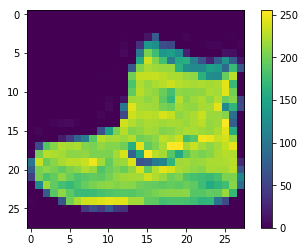

In [10]:
#我们显示第一张图片，会发现每个值都在0-255（灰度）之间，这是一双鞋子(踝靴)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
print(train_labels[0], class_names[train_labels[0]])
plt.show()


In [11]:
# 在输入网络之前，我们将这些值归一化到0-1之间。我们让每个值除以255，这样一来这些值从整数变为浮点数
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
# 让matplotlib能够显示中文，将字体文件装入font
import matplotlib.font_manager as fm
font = fm.FontProperties(fname='simsun.ttc')

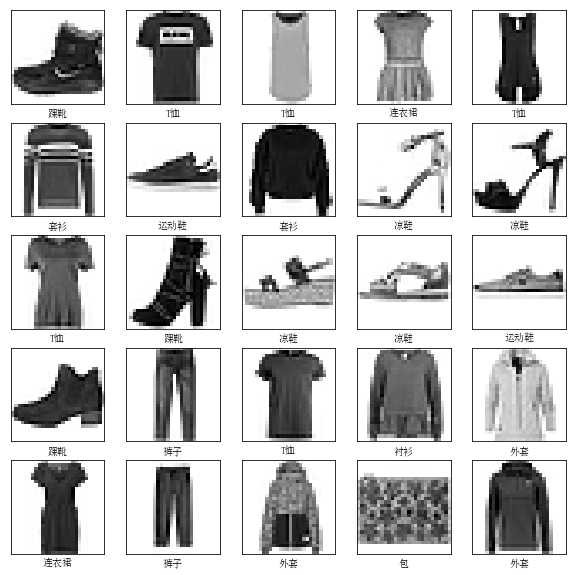

In [13]:
# 我们显示前25个训练图片和各自标签，确认这些数据是正确的
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # 显示中文需要调用字体文件
    plt.xlabel(class_names[train_labels[i]], fontproperties=font)

## 创建模型

创建神经网络模型需要先定义层，然后再编译模型。

### 设定层结构

神经网络最基本的单位是层，这些层从数据中抽取具有信息量的数据，以针对特别的问题。
很多的深层网络都是通过连接多个简单层。很多的层，比如[全连接层](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)，通过训练对参数进行学习。

In [16]:
model = tf.keras.Sequential([
    # Flatten层用来展开二维数组到一维，28 * 28 = 784 像素点
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 全连接层，用ReLU函数激活
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    # 输出层，以Softmax对应10个类别
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### 编译模型

在训练网络之前，我们还需要对网络进行编译，其步骤包括：
- 损失函数：这个函数计算在训练过程中的精度。我们期望最小化这个函数，使其正确指导训练的方向。
- 优化器：优化器表示模型如何根据训练数据和损失函数进行参数更新。
- 度量：用于监控训练和测试过程。这里用精度来度量训练结果。

In [17]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 训练模型

训练神经网络模型要求以下几个步骤：
- 填充训练数据到模型里，这个例子里训练数据是我们的训练图片和标签
- 该模型学会了关联图像和标签。
- 在测试数据上进行测试，看预测标签和实际的标签是不是一致

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.5001 - acc: 0.8246
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.3756 - acc: 0.8656
Epoch 3/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.3360 - acc: 0.8781
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3102 - acc: 0.8859
Epoch 5/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.2927 - acc: 0.8929


## 测试精度

在测试数据上测试分类精度。
可以看到在测试数据上精度略小于训练数据。这个区别体现了过拟合的一个例子。所谓过拟合指的是机器学习模型在新的数据上没有在其训练数据上表现的好。

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 22us/step
Test accuracy: 0.8789


## 进行预测

In [23]:
# 用训练好的模型预测测试数据
predictions = model.predict(test_images)
# 生成一个10000*10的数组，对应测试数据中10000个数据，每个数据包含10个对应0-9标签的从softmax层输出的概率，或者说“信念”（confidence）
predictions.shape

(10000, 10)

In [24]:
# 使用argmax函数，可以输出最大值在数组中的下标
import numpy as np
np.argmax(predictions[0])

9

In [44]:
# 通过下面的函数，我们对一张图片在9个频道上的信念做可视化
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color, fontproperties=font)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

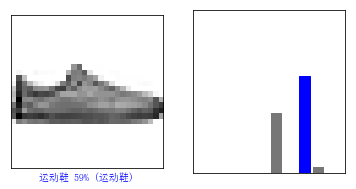

In [30]:
# 于是我们可以看某个图片在各个频道上的概率
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

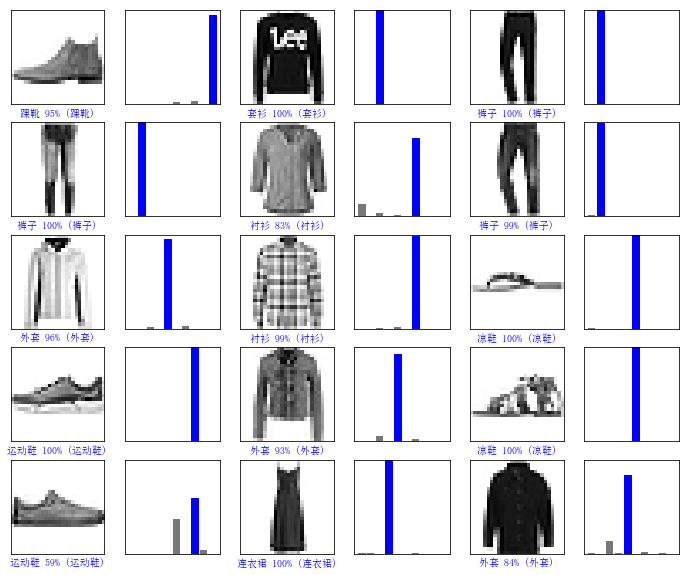

In [32]:
# 我们可视化前X张测试图片，以及他们的标签，正确的预测显示为蓝色，错误的预测显示为红色（这里没有错误的预测）
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [33]:
# 最后，我们用训练好的模型预测一个单张照片

# 从测试集中取出一张图片
img = test_images[0]
print(img.shape)

(28, 28)


In [34]:
# tf.keras 模型用于预测一组数据，因此即使预测仅仅一个数据，我们也需要将其转换为只包含一个数据的列表
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [35]:
#进行预测
predictions_single = model.predict(img)
print(predictions_single)

[[4.0764014e-08 5.4684122e-08 3.0388151e-08 3.1891718e-09 1.4615067e-07
  1.8796304e-02 1.2304756e-06 3.1462602e-02 8.8851755e-07 9.4973868e-01]]


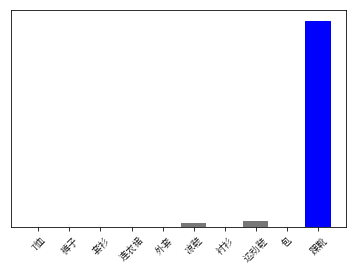

In [45]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45, fontproperties=font)

In [47]:
# model.predict 会返回一个二维列表，包含每一个测试数据在每一个标签上的信念
np.argmax(predictions_single[0])

9

In [48]:
# 以下是本文的版本信息
# @title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.